## Install in terminal

In [1]:
import dokdo

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
np.random.seed(1)

In [91]:
## 1. Denoising stats

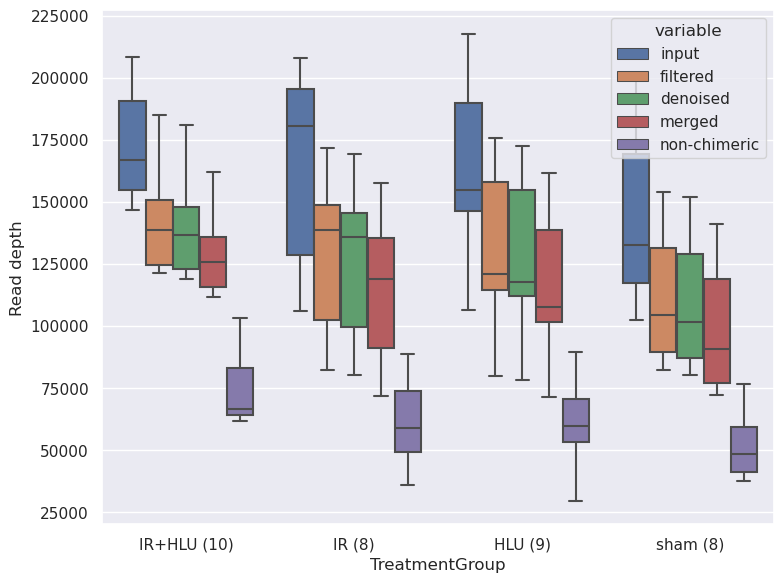

In [92]:
qza_file = '/mnt/e/NASA_microbiome/downstream/dada2-pe-stats.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

dokdo.denoising_stats_plot(
    qza_file,
    metadata_file,
    'TreatmentGroup',
    figsize=(8, 6)
)

plt.tight_layout()

In [93]:
## Enhanced with seaborn package

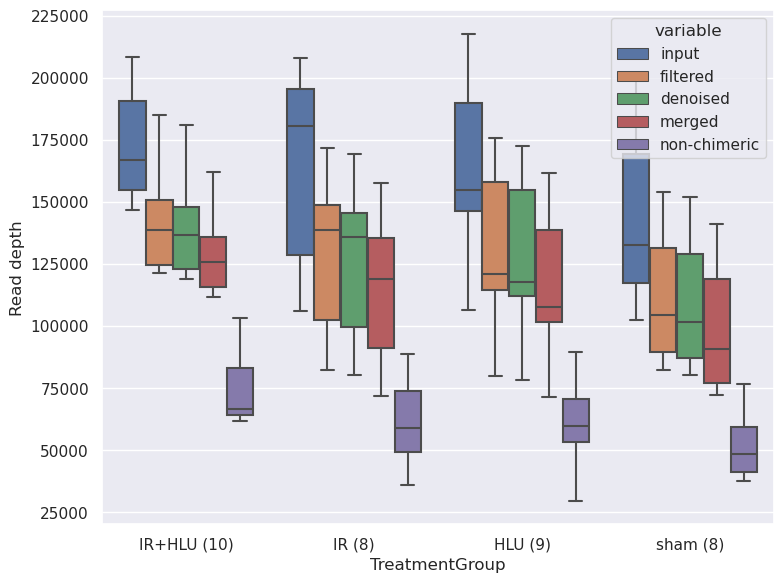

In [94]:
import seaborn as sns

with sns.axes_style('darkgrid'):
    dokdo.denoising_stats_plot(
        qza_file,
        metadata_file,
        'TreatmentGroup',
        figsize=(8, 6)
    )

plt.tight_layout()

## 2. Taxa Bar Plots

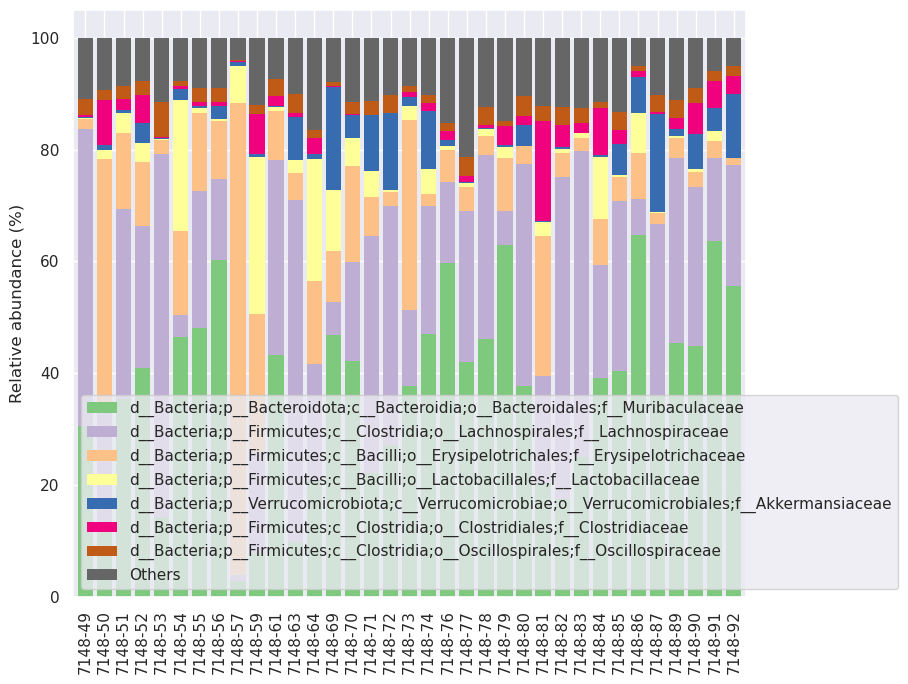

In [95]:
qzv_file = '/mnt/e/NASA_microbiome/downstream/taxa_barplot.qzv'

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    level=5,
    count=8,
    figsize=(9, 7)
)

plt.tight_layout()

## Plot legends seperately

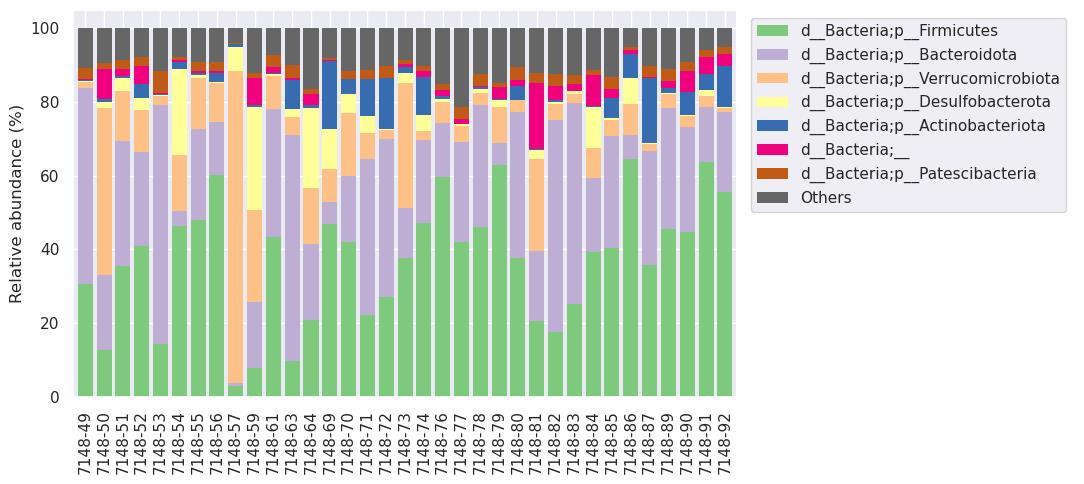

In [96]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [9, 1]})

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    level=5,
    count=8,
    ax=ax1,
    legend=False
)

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    level=2,
    count=8,
    ax=ax2
)

handles, labels = ax2.get_legend_handles_labels()

ax2.clear()
ax2.legend(handles, labels)
ax2.axis('off')

plt.tight_layout()

## 3. Plotting QIIME 2 Files vs. Objects

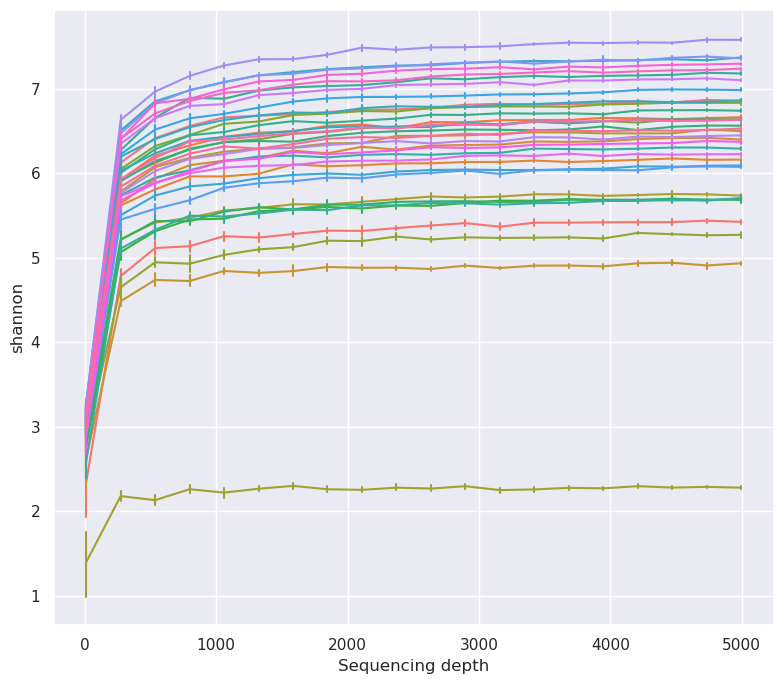

In [97]:
from qiime2 import Artifact, Metadata
from qiime2.plugins import diversity

qzv_file = '/mnt/e/NASA_microbiome/downstream/alpha_nasa_rarefaction_curves.qzv'

dokdo.alpha_rarefaction_plot(qzv_file, legend=False, figsize=(8, 7))

plt.tight_layout()

## 3. PCOA results

# Explained proportions computed by QIIME 2:
# 10.75% for Axis 1
# 9.31% for Axis 2


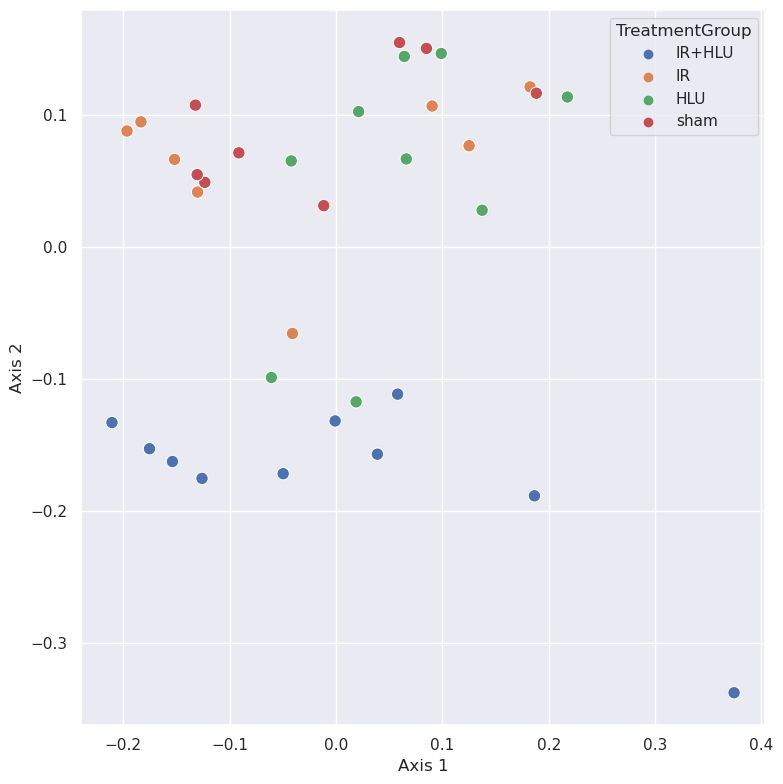

In [98]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

qza_file = '/mnt/e/NASA_microbiome/downstream/table-no-ecmu.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

pcoa_results = dokdo.ordinate(qza_file)

dokdo.beta_2d_plot(
    pcoa_results,
    metadata=metadata_file,
    hue='TreatmentGroup',
    figsize=(8, 8)
)

plt.tight_layout()

## Subset some groups

# Explained proportions computed by QIIME 2:
# 17.25% for Axis 1
# 14.19% for Axis 2


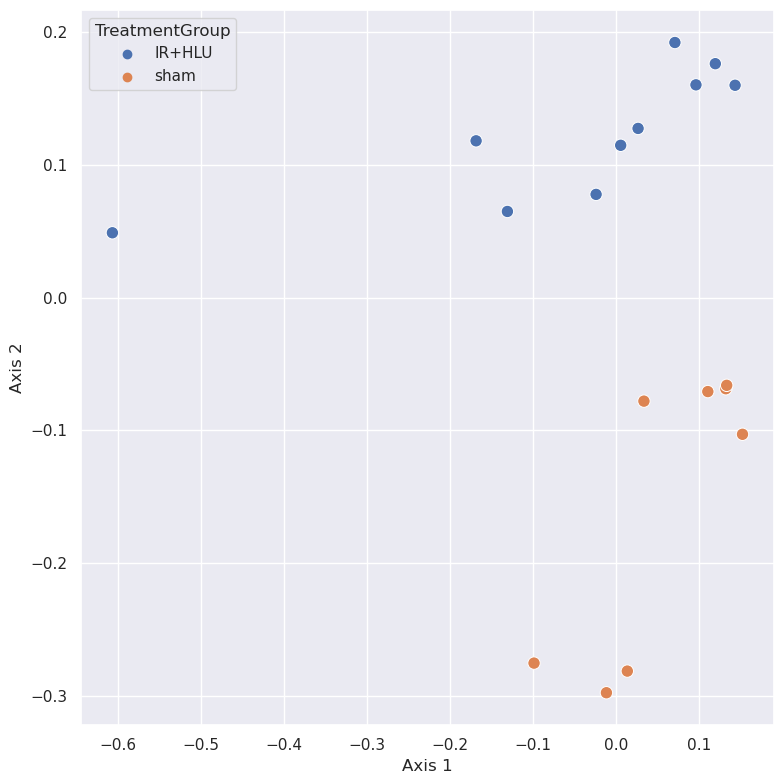

In [99]:
from qiime2 import Metadata

mf = dokdo.get_mf(metadata_file)
mf = mf[mf['TreatmentGroup'].isin(['sham', 'IR+HLU'])]

pcoa_results = dokdo.ordinate(qza_file, metadata=Metadata(mf))

dokdo.beta_2d_plot(
    pcoa_results,
    metadata=metadata_file,
    hue='TreatmentGroup',
    figsize=(8, 8)
)

plt.tight_layout()

## You can also generate a biplot.

# Explained proportions computed by QIIME 2:
# 10.75% for Axis 1
# 9.31% for Axis 2


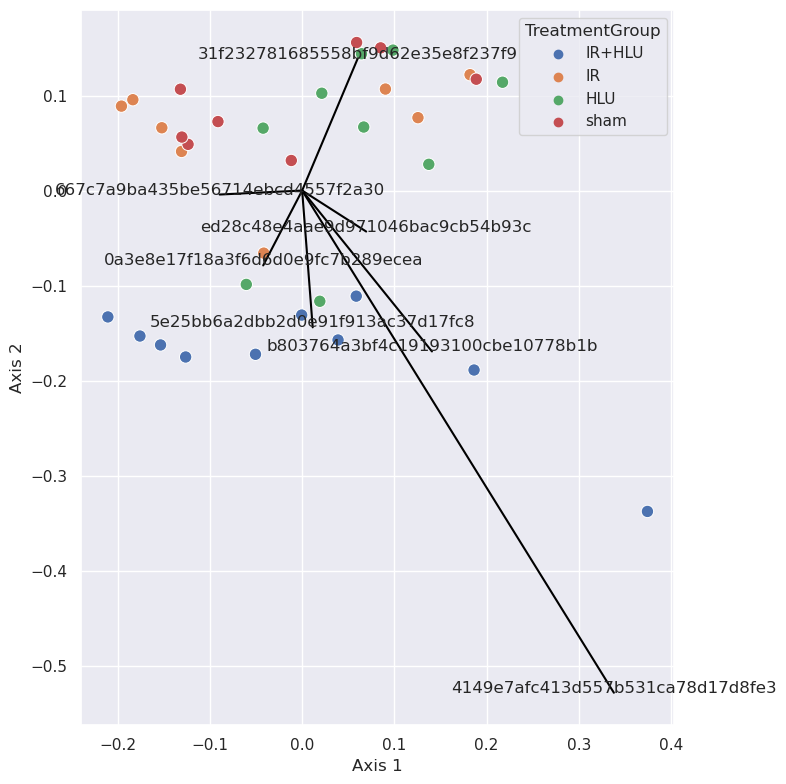

In [100]:
pcoa_results = dokdo.ordinate(qza_file, biplot=True, number_of_dimensions=10)

ax = dokdo.beta_2d_plot(
    pcoa_results,
    metadata=metadata_file,
    hue='TreatmentGroup',
    figsize=(8, 8)
)

dokdo.addbiplot(pcoa_results, ax=ax, count=7)

plt.tight_layout()

## Alpha_rarefaction

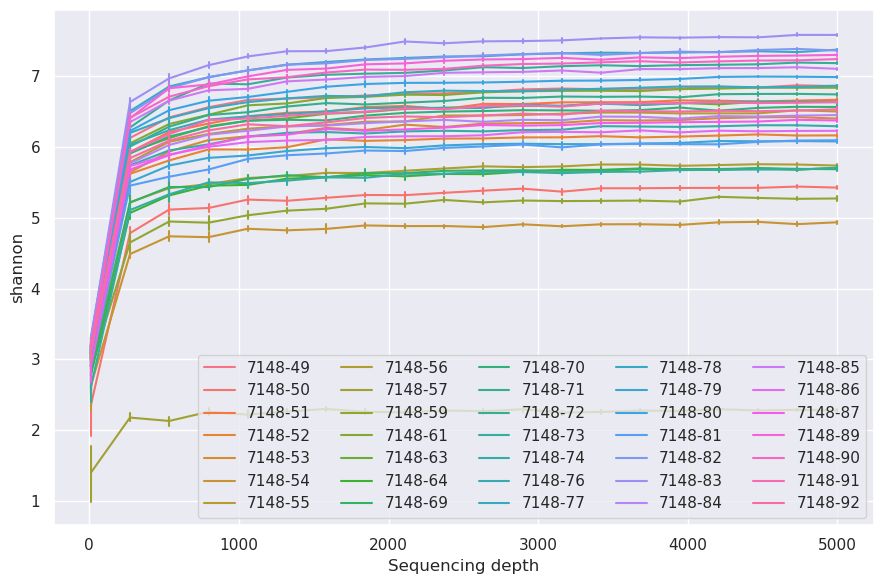

In [101]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
qzv_file = '/mnt/e/NASA_microbiome/downstream/alpha_nasa_rarefaction_curves.qzv'
ax = dokdo.alpha_rarefaction_plot(qzv_file,
                                  figsize=(9, 6))
ax.legend(ncol=5)
plt.tight_layout()

## Group samples by groups for alpha_rarefaction

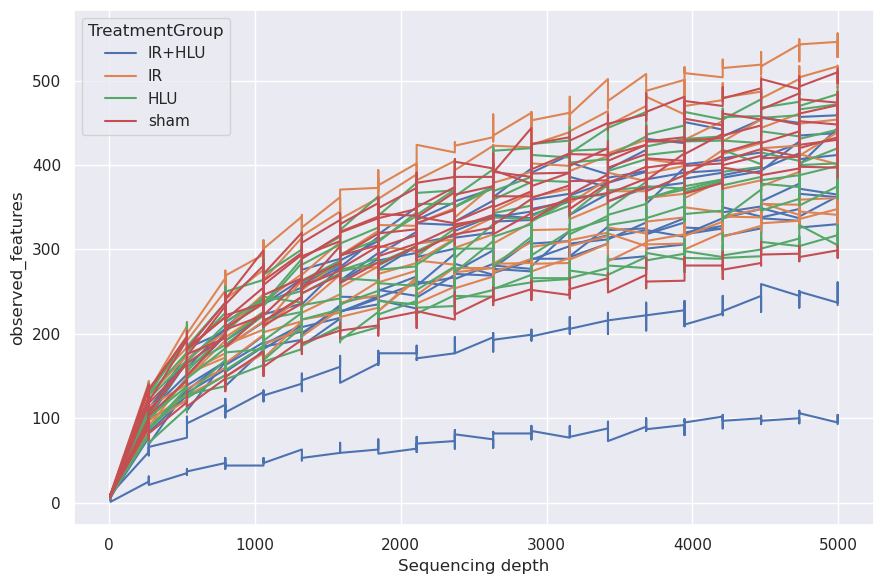

In [102]:
dokdo.alpha_rarefaction_plot(qzv_file,
                             hue='TreatmentGroup',
                             metric='observed_features',
                             figsize=(9, 6),
                             units='sample-id',
                             estimator=None)
plt.tight_layout()

## Alternatively, we can aggregate the samples by body-site:

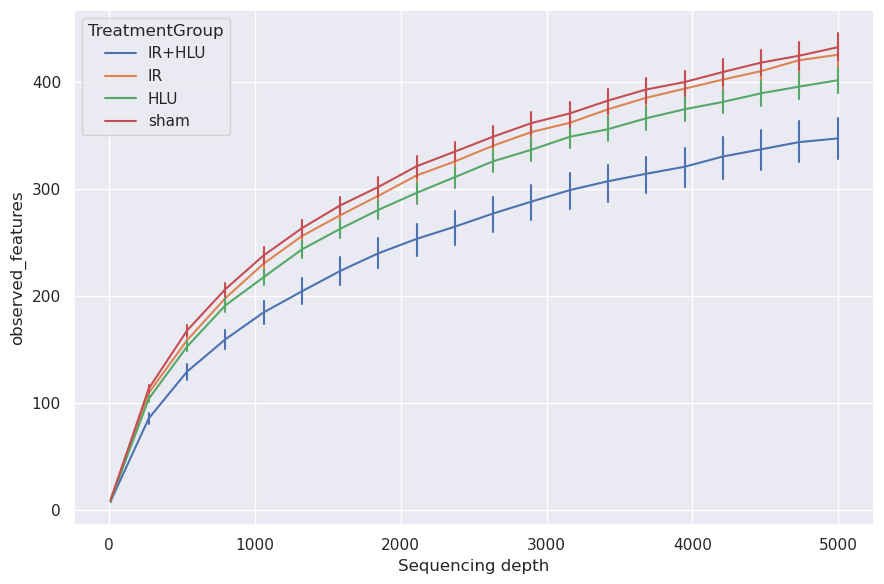

In [103]:
dokdo.alpha_rarefaction_plot(qzv_file,
                             hue='TreatmentGroup',
                             metric='observed_features',
                             figsize=(9, 6))
plt.tight_layout()

## 4. Alpha diversity 

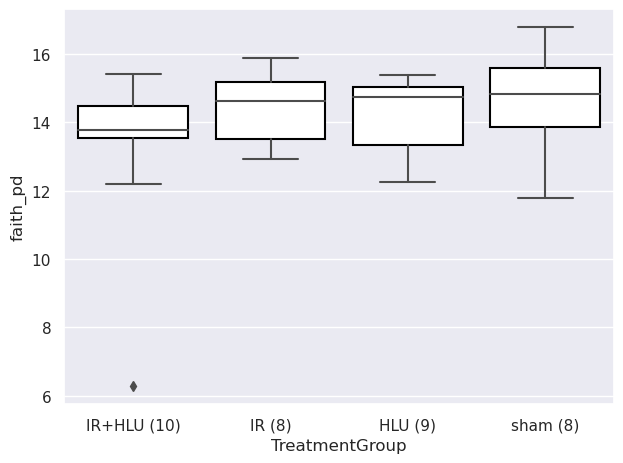

In [104]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
qza_file = '/mnt/e/NASA_microbiome/downstream/faith_pd_vector.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'
dokdo.alpha_diversity_plot(qza_file, metadata_file, 'TreatmentGroup')
plt.tight_layout()

## 5. Beta 2d plots

# Explained proportions computed by QIIME 2:
# 14.33% for Axis 1
# 8.15% for Axis 2


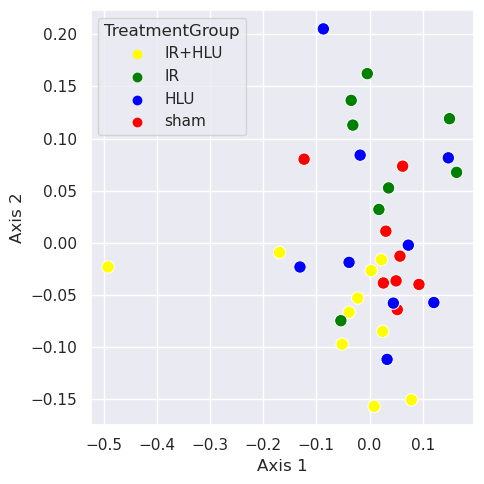

In [108]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

qza_file = '/mnt/e/NASA_microbiome/downstream/unweighted_unifrac_pcoa_results.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

palette = {'IR+HLU': 'yellow', 'IR': 'green', 'HLU': 'blue', 'sham': 'red'}

dokdo.beta_2d_plot(qza_file,
                   metadata_file,
                   hue='TreatmentGroup', 
                   palette=palette,
                   figsize=(5, 5))
plt.tight_layout()

## Beta 3d 

# Explained proportions computed by QIIME 2:
# 14.33% for Axis 1
# 8.15% for Axis 2
# 7.45% for Axis 3


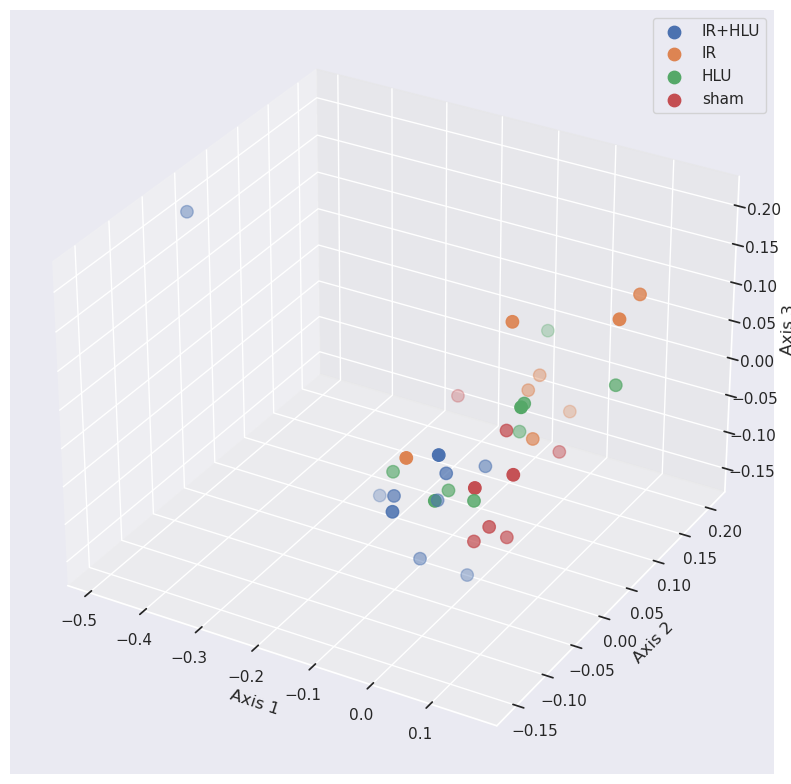

In [109]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
qza_file = '/mnt/e/NASA_microbiome/downstream/unweighted_unifrac_pcoa_results.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'
dokdo.beta_3d_plot(qza_file,
                   metadata=metadata_file,
                   hue='TreatmentGroup',
                   figsize=(8, 8))
plt.tight_layout()

## We can control the camera angle with elev and azim:

# Explained proportions computed by QIIME 2:
# 14.33% for Axis 1
# 8.15% for Axis 2
# 7.45% for Axis 3
# Explained proportions computed by QIIME 2:
# 14.33% for Axis 1
# 8.15% for Axis 2
# 7.45% for Axis 3


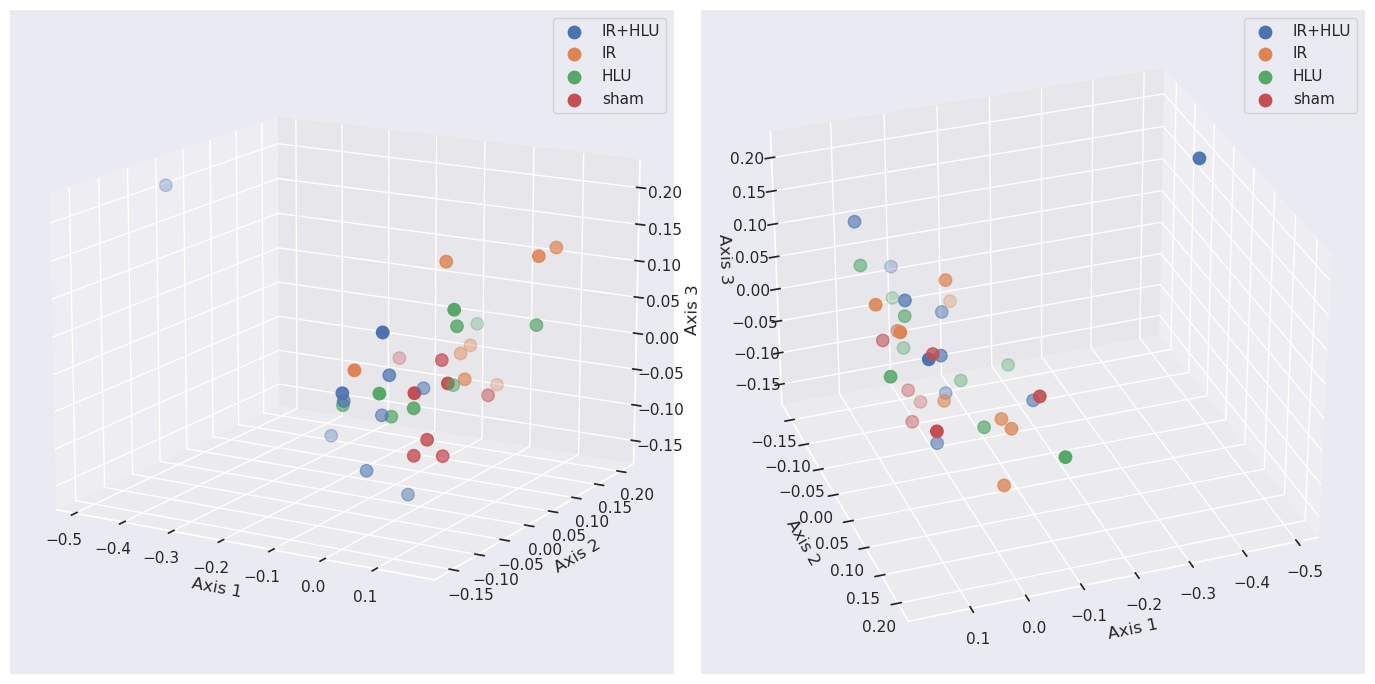

In [110]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
dokdo.beta_3d_plot(qza_file,
                   metadata=metadata_file,
                   ax=ax1,
                   hue='TreatmentGroup',
                   elev=15)
dokdo.beta_3d_plot(qza_file,
                   metadata=metadata_file,
                   ax=ax2,
                   hue='TreatmentGroup',
                   azim=70)
plt.tight_layout()

## 6. Taxa abundance bar plot

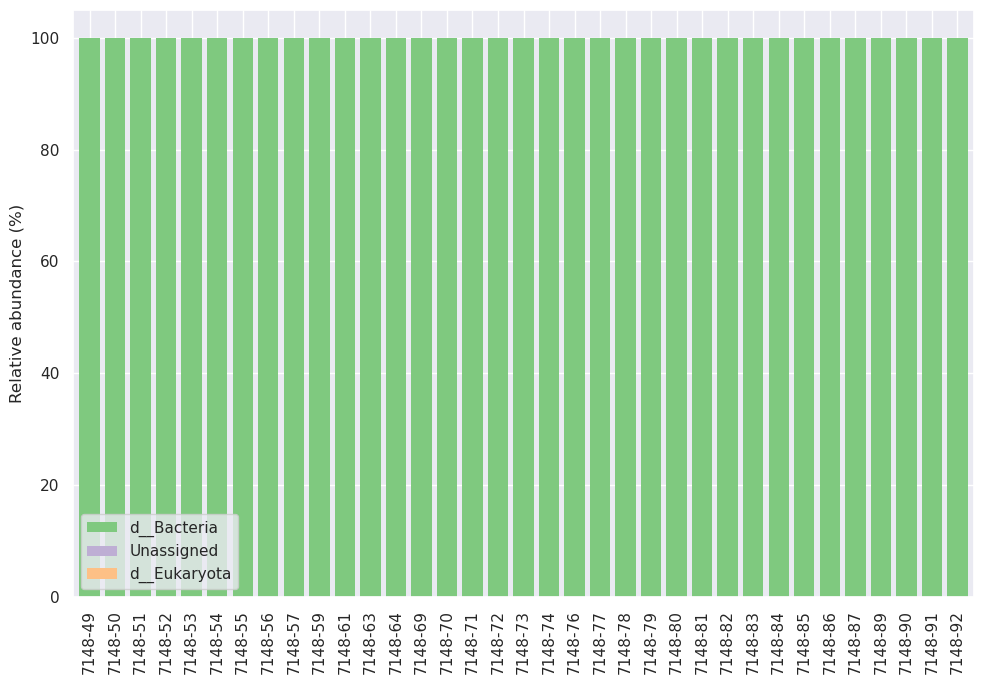

In [111]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

qzv_file = '/mnt/e/NASA_microbiome/downstream/taxa_barplot.qzv'

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    figsize=(10, 7)
)

plt.tight_layout()

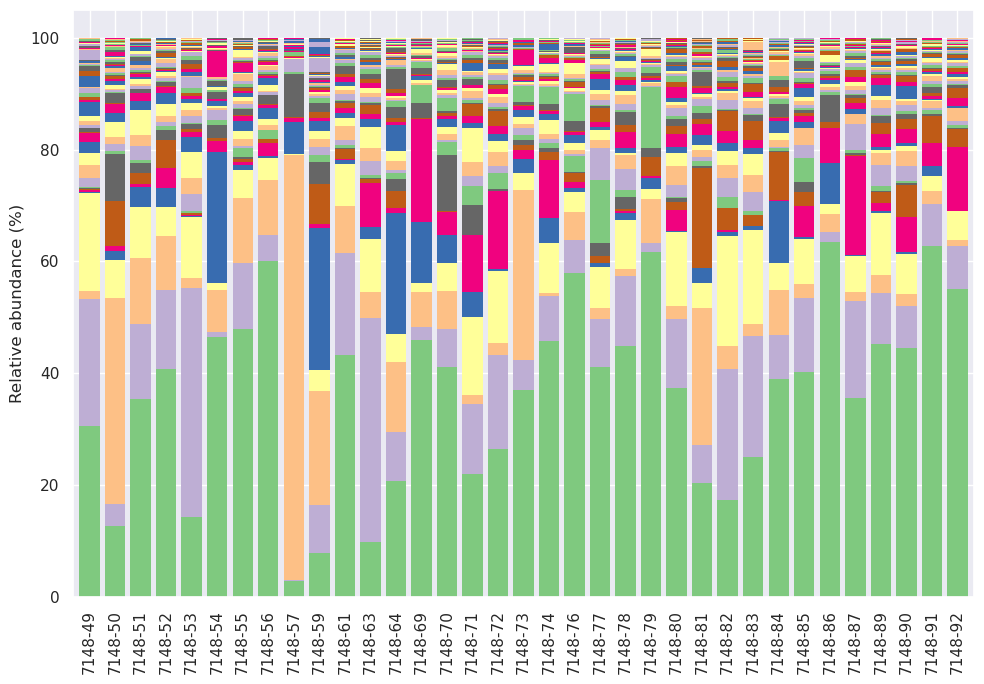

In [112]:
dokdo.taxa_abundance_bar_plot(
    qzv_file,
    figsize=(10, 7),
    level=6,
    legend=False
)

plt.tight_layout()

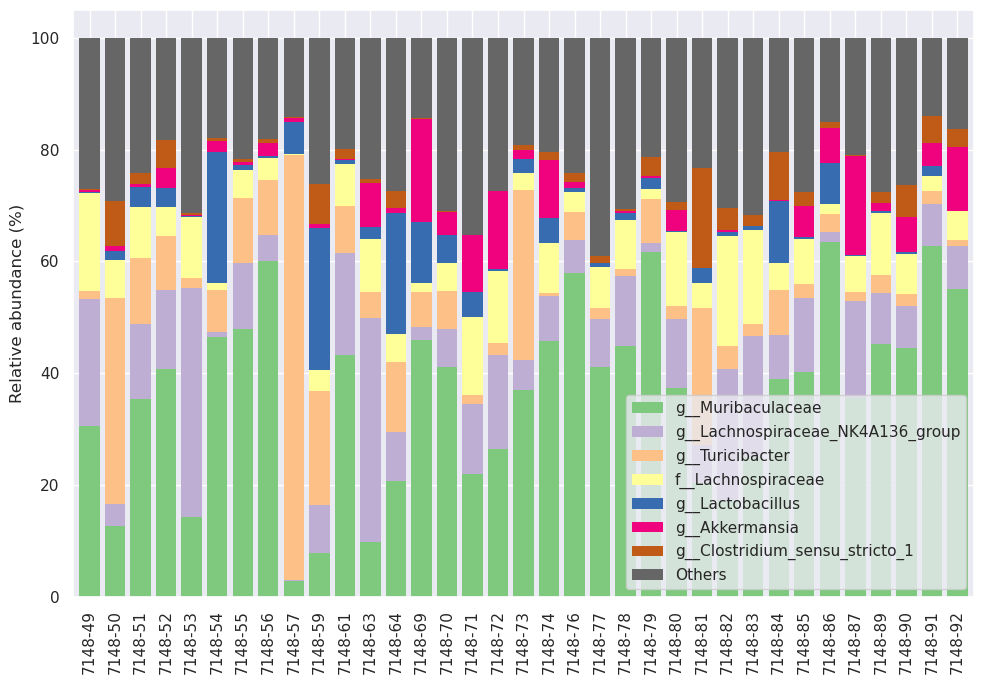

In [113]:
dokdo.taxa_abundance_bar_plot(
    qzv_file,
    figsize=(10, 7),
    level=6,
    count=8,
    legend_short=True
)

plt.tight_layout()


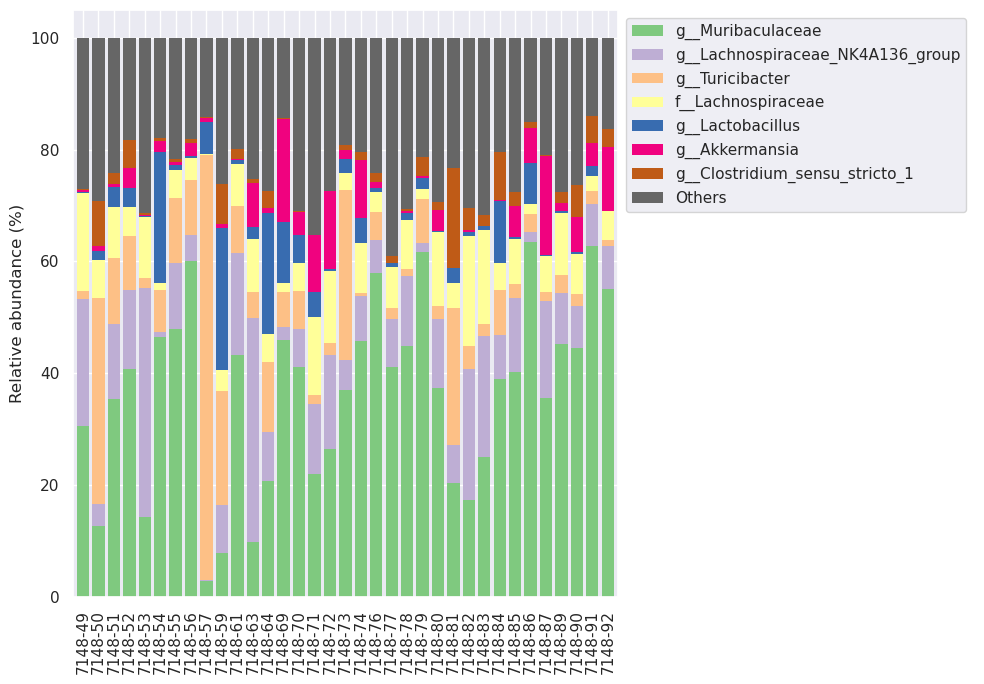

In [114]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [9, 1]})

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    ax=ax1,
    level=6,
    count=8,
    legend=False
)

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    ax=ax2,
    level=6,
    count=8,
    legend_short=True
)

handles, labels = ax2.get_legend_handles_labels()

ax2.clear()
ax2.legend(handles, labels)
ax2.axis('off')

plt.tight_layout()

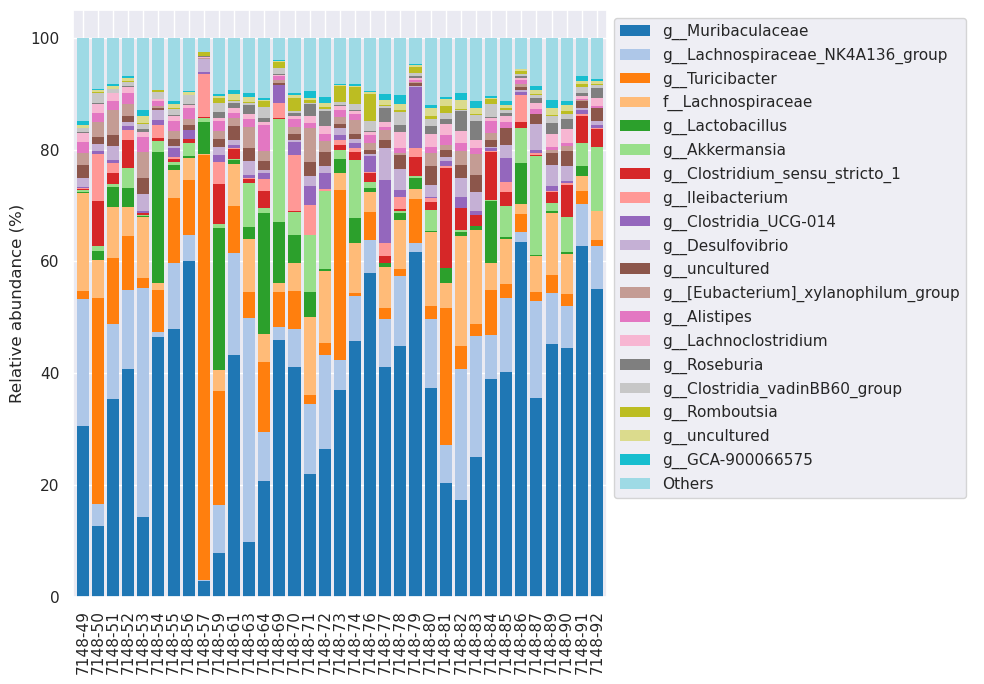

In [115]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [9, 1]})

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    ax=ax1,
    level=6,
    count=20,
    cmap_name='tab20',
    legend=False
)

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    ax=ax2,
    level=6,
    count=20,
    cmap_name='tab20',
    legend_short=True
)

handles, labels = ax2.get_legend_handles_labels()

ax2.clear()
ax2.legend(handles, labels)
ax2.axis('off')

plt.tight_layout()

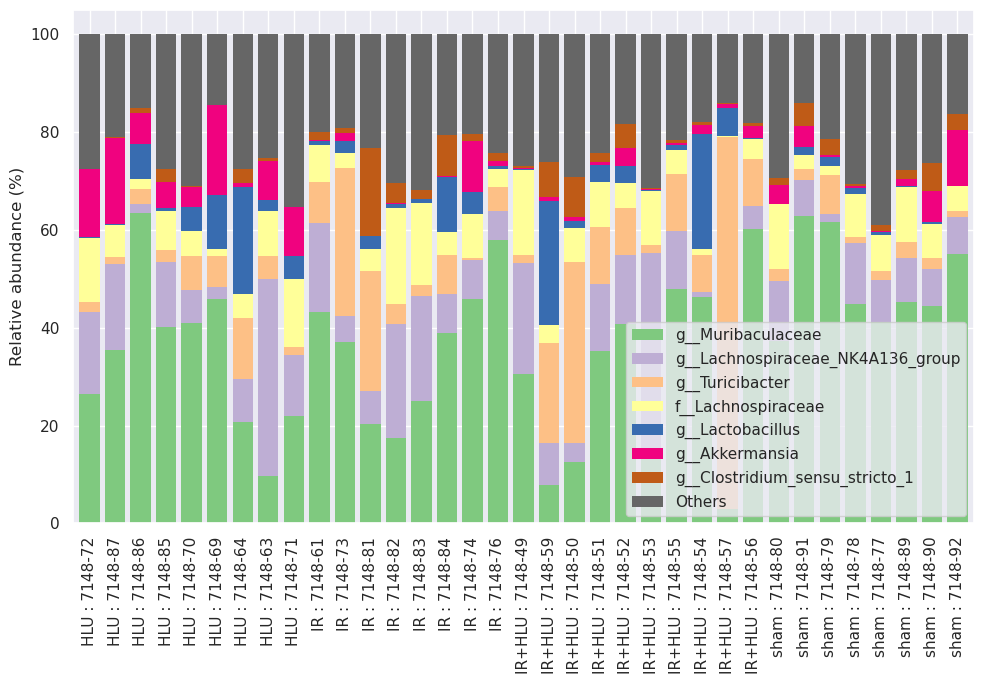

In [116]:
dokdo.taxa_abundance_bar_plot(
    qzv_file,
    by=['TreatmentGroup'],
    label_columns=['TreatmentGroup', 'sample-id'],
    figsize=(10, 7),
    level=6,
    count=8,
    legend_short=True
)

plt.tight_layout()

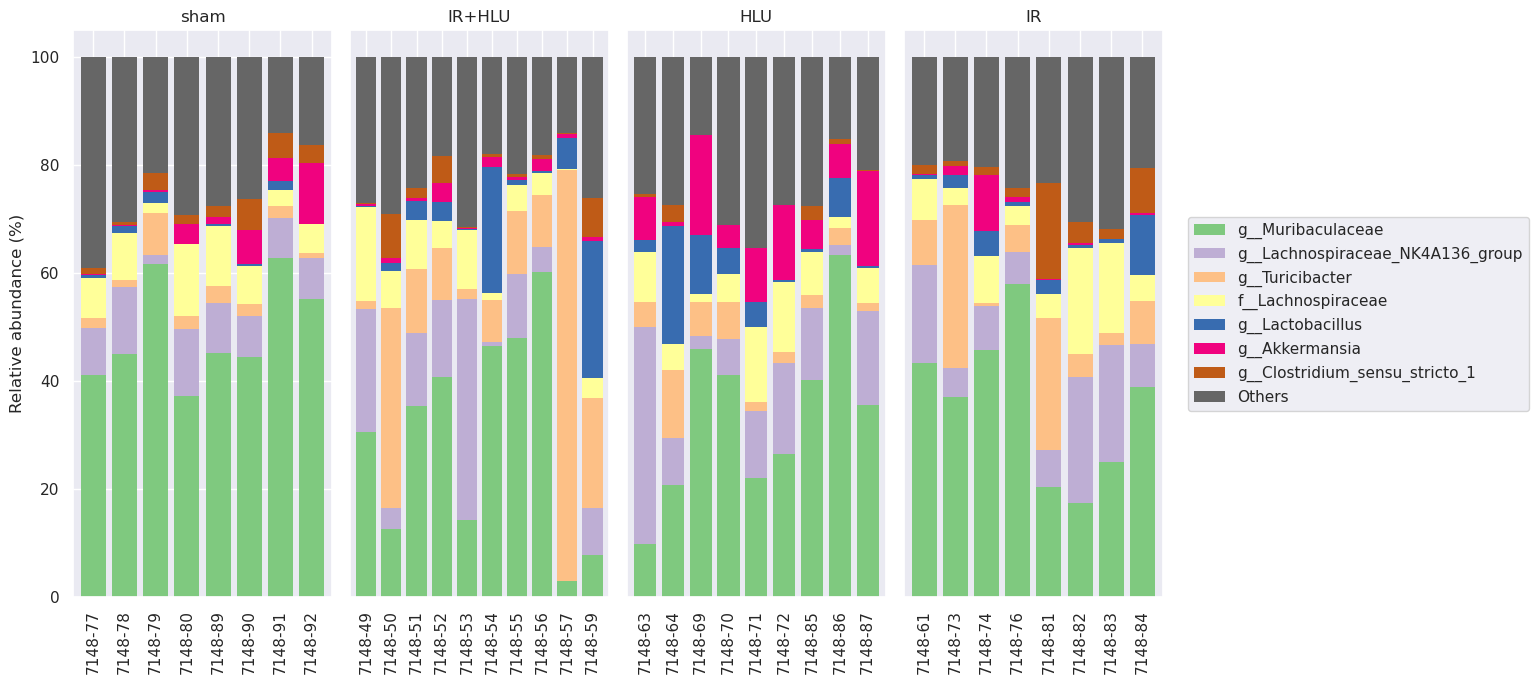

In [117]:
fig, axes = plt.subplots(1, 5, figsize=(16, 7))

groups = ['sham','IR+HLU', 'HLU', 'IR']
kwargs = dict(level=6, count=8, sort_by_mean2=False, legend=False)

for i, group in enumerate(groups):
    dokdo.taxa_abundance_bar_plot(
        qzv_file,
        ax=axes[i],
        include_samples={'TreatmentGroup': [group]},
        **kwargs
    )
    if i != 0:
        axes[i].set_ylabel('')
        axes[i].set_yticks([])
    axes[i].set_title(group)

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    ax=axes[4],
    legend_short=True,
    **kwargs
)

handles, labels = axes[4].get_legend_handles_labels()

axes[4].clear()
axes[4].legend(handles, labels, loc='center left')
axes[4].axis('off')

plt.tight_layout()

## Create a bar for each Group.

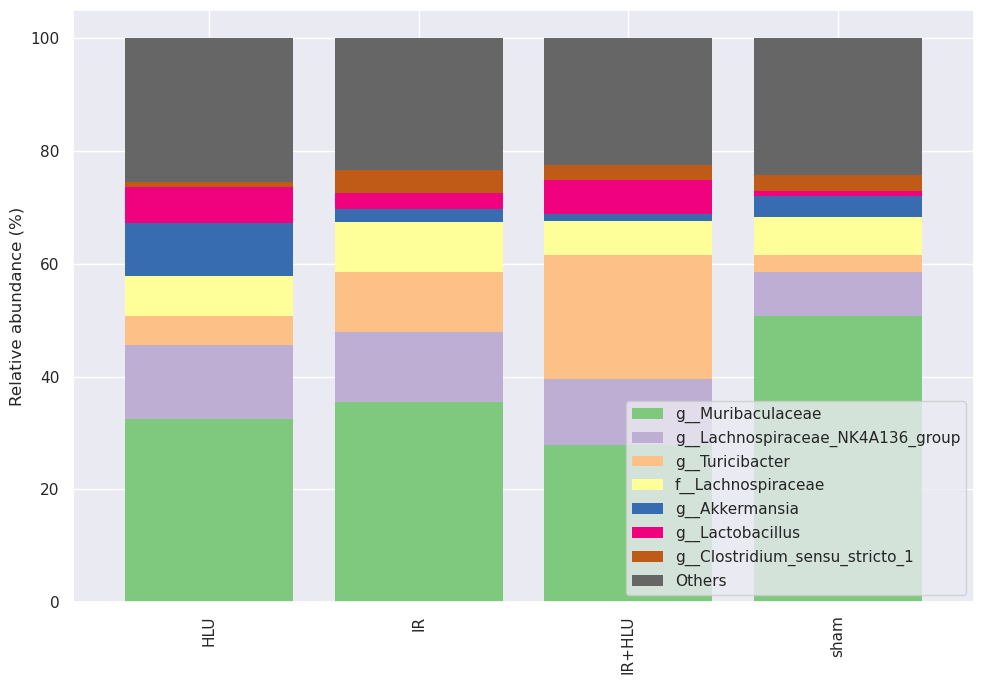

In [118]:
dokdo.taxa_abundance_bar_plot(
    qzv_file,
    level=6,
    count=8,
    group='TreatmentGroup',
    figsize=(10, 7),
    legend_short=True
)

plt.tight_layout()

## taxa_abundance_box_plot

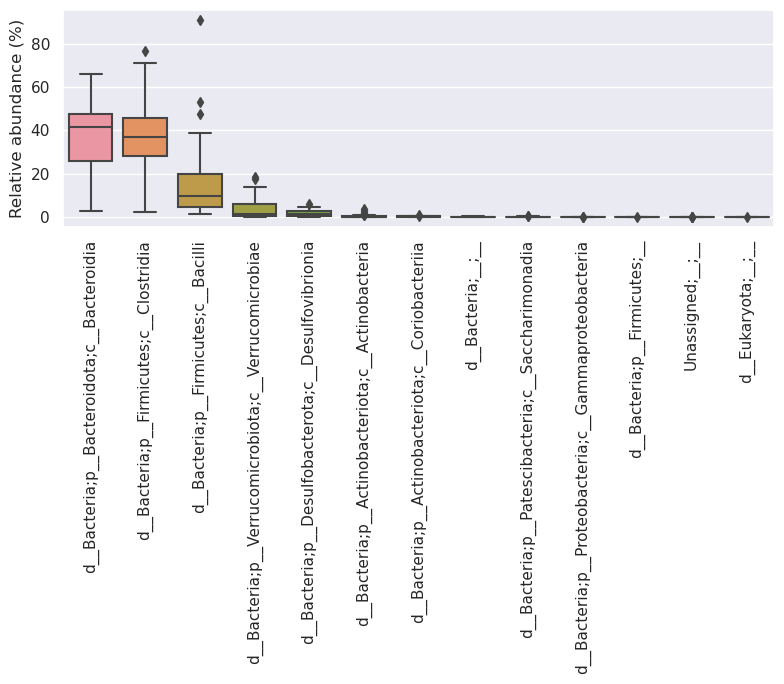

In [119]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

qzv_file = '/mnt/e/NASA_microbiome/downstream/taxa_barplot.qzv'
dokdo.taxa_abundance_box_plot(
    qzv_file,
    level=3,
    figsize=(8, 7)
)
plt.tight_layout()

## 7. Heatmap

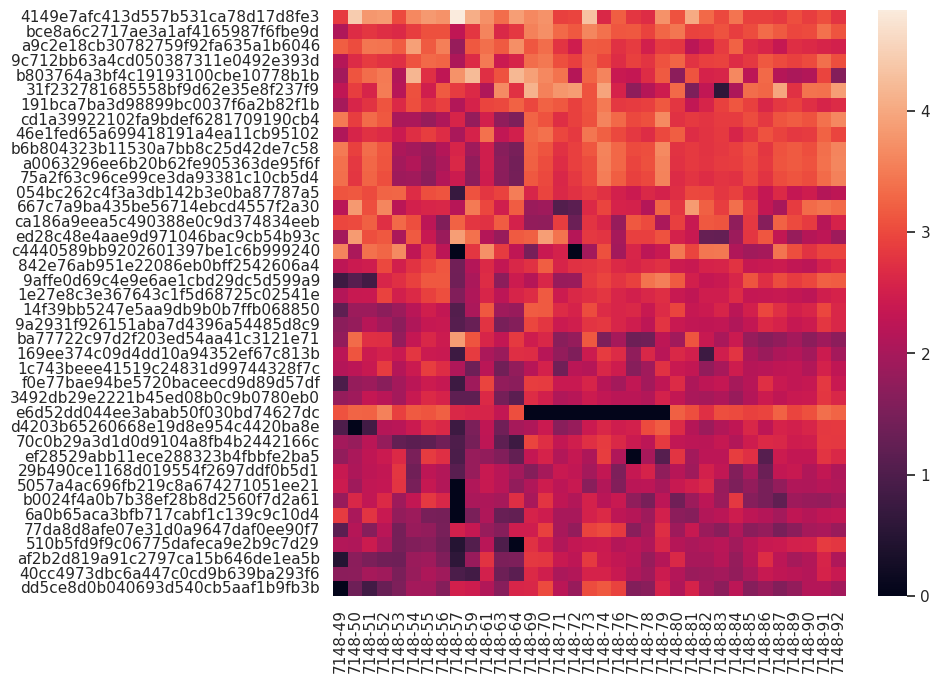

In [120]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
qza_file = '/mnt/e/NASA_microbiome/downstream/table-no-ecmu.qza'
dokdo.heatmap(qza_file,
              normalize='log10',
              flip=True,
              count = 40,
              figsize=(10, 7))
plt.tight_layout()

## We can display a heatmap for each sample group:

/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]


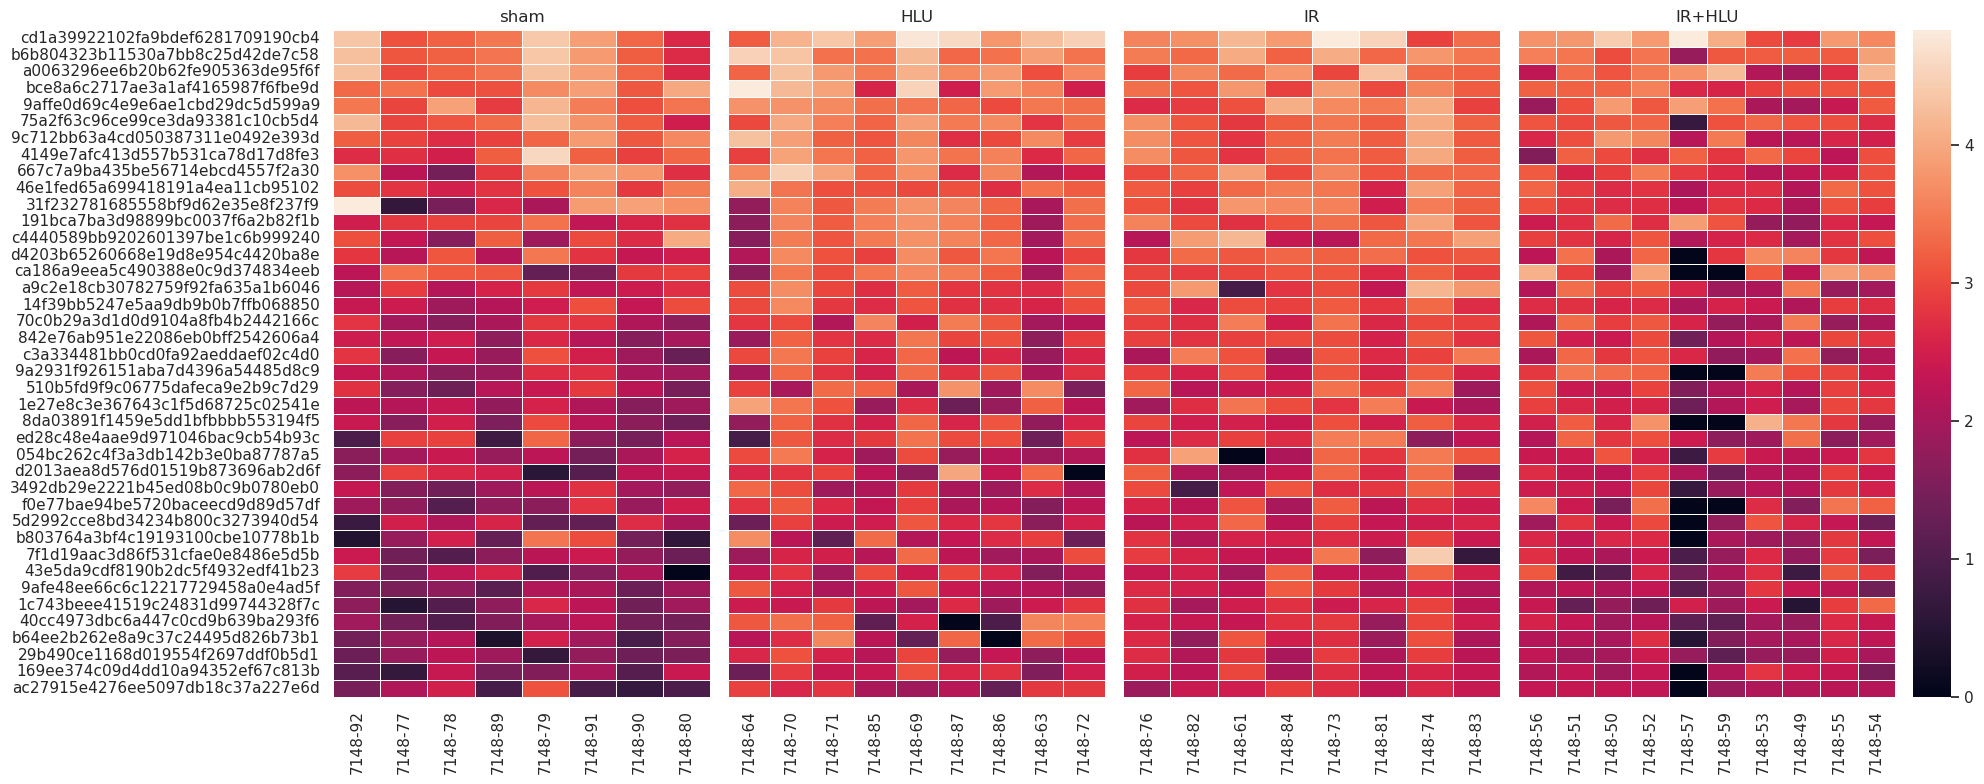

In [121]:
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(1, 5,
                                              figsize=(20, 8),
                                              gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.1]})

kwargs = dict(normalize='log10',
              flip=True,
              linewidths=0.5,
              metadata=metadata_file,
              count = 40, 
              xticklabels=True)

qza_file = '/mnt/e/NASA_microbiome/downstream/table-no-ecmu.qza'

dokdo.heatmap(qza_file, ax=ax1, where="[TreatmentGroup] IN ('sham')", cbar=False, yticklabels=True, **kwargs)
dokdo.heatmap(qza_file, ax=ax2, where="[TreatmentGroup] IN ('HLU')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax3, where="[TreatmentGroup] IN ('IR')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax4, where="[TreatmentGroup] IN ('IR+HLU')", yticklabels=False, cbar_ax=ax5, **kwargs)

ax1.set_title('sham')
ax2.set_title('HLU')
ax3.set_title('IR')
ax4.set_title('IR+HLU')

plt.tight_layout()

## 8. Alpha diversity with significance

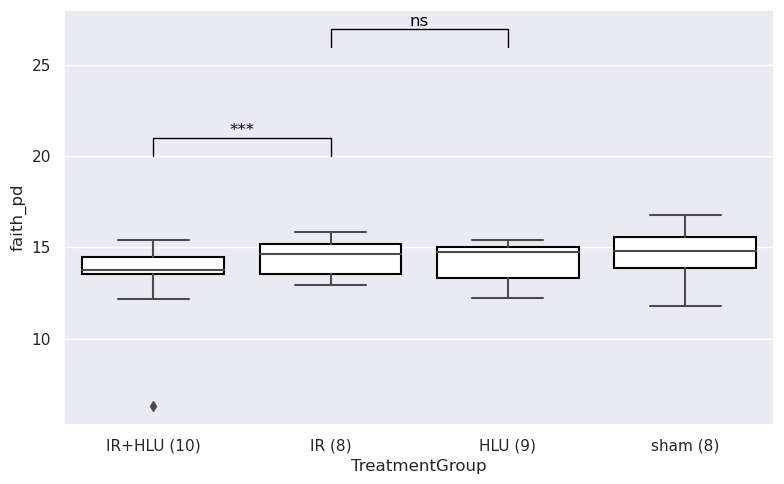

In [122]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
vector_file = '/mnt/e/NASA_microbiome/downstream/faith_pd_vector.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

ax = dokdo.alpha_diversity_plot(vector_file, metadata_file, 'TreatmentGroup', figsize=(8, 5))
dokdo.addsig(0, 1, 20, t='***', ax=ax)
dokdo.addsig(1, 2, 26, t='ns', ax=ax)
plt.tight_layout()

## 9. Draw arrows (features) to an existing PCoA plot.

# Explained proportions computed by QIIME 2:
# 11.14% for Axis 1
# 9.93% for Axis 2


IndexError: list index out of range

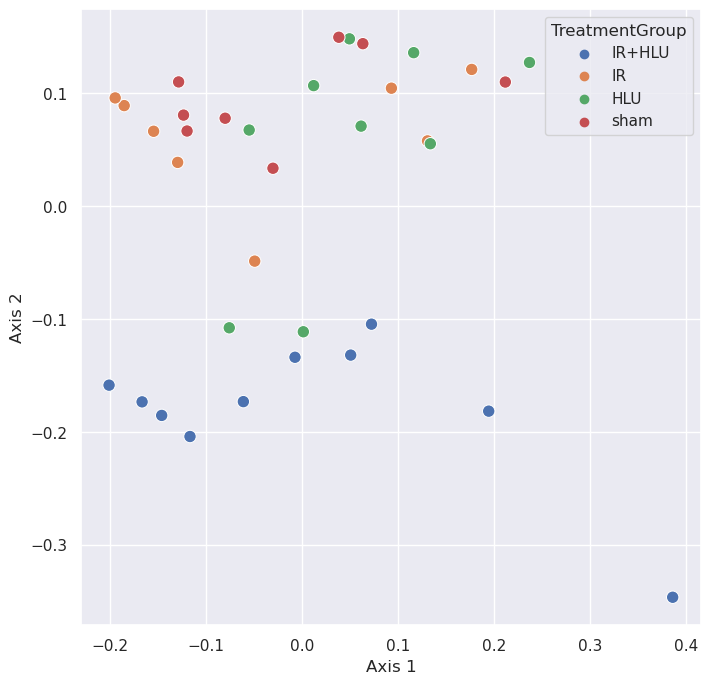

In [123]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

table_file = '/mnt/e/NASA_microbiome/downstream/table-no-ecmu.qza'
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

taxonomy_file = '/mnt/e/NASA_microbiome/downstream/taxonomy.qza'

pcoa_results = dokdo.ordinate(table_file, sampling_depth=0, biplot=True, number_of_dimensions=10)
ax = dokdo.beta_2d_plot(pcoa_results,
                        hue='TreatmentGroup',
                        metadata=metadata_file,
                        figsize=(8, 8))

dokdo.addbiplot(pcoa_results,
                ax=ax,
                count=24,
                dim=2,
                taxonomy=taxonomy_file,
                name_type='taxon',
                level=6)
plt.tight_layout()

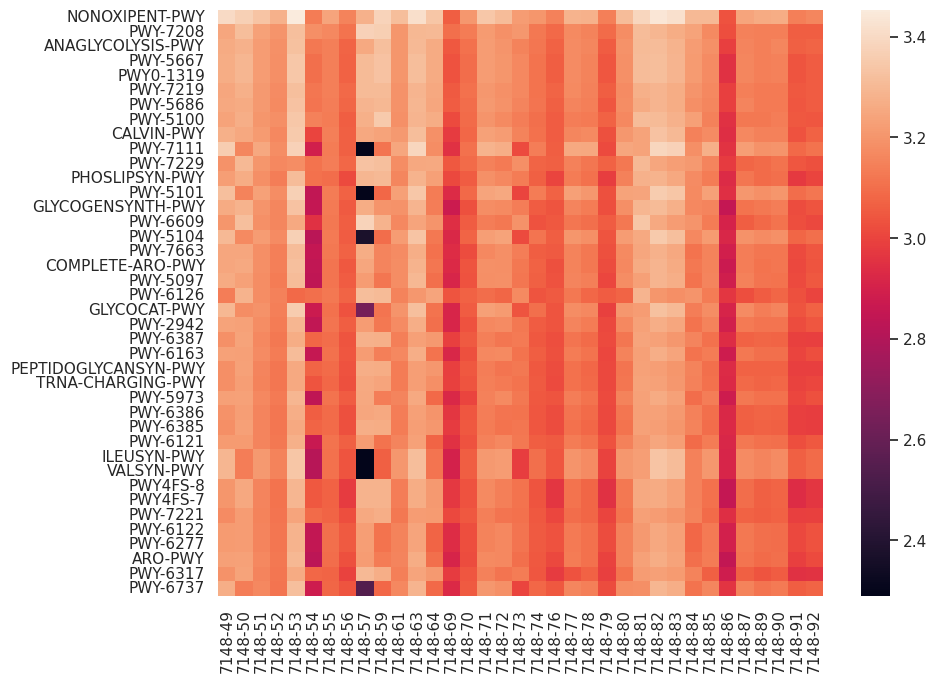

In [4]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
qza_file = '/mnt/e/NASA_microbiome/downstream/pathway_abundance.qza'
dokdo.heatmap(qza_file,
              normalize='log10',
              flip=True,
              count = 40,
              figsize=(10, 7))
plt.tight_layout()

/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]


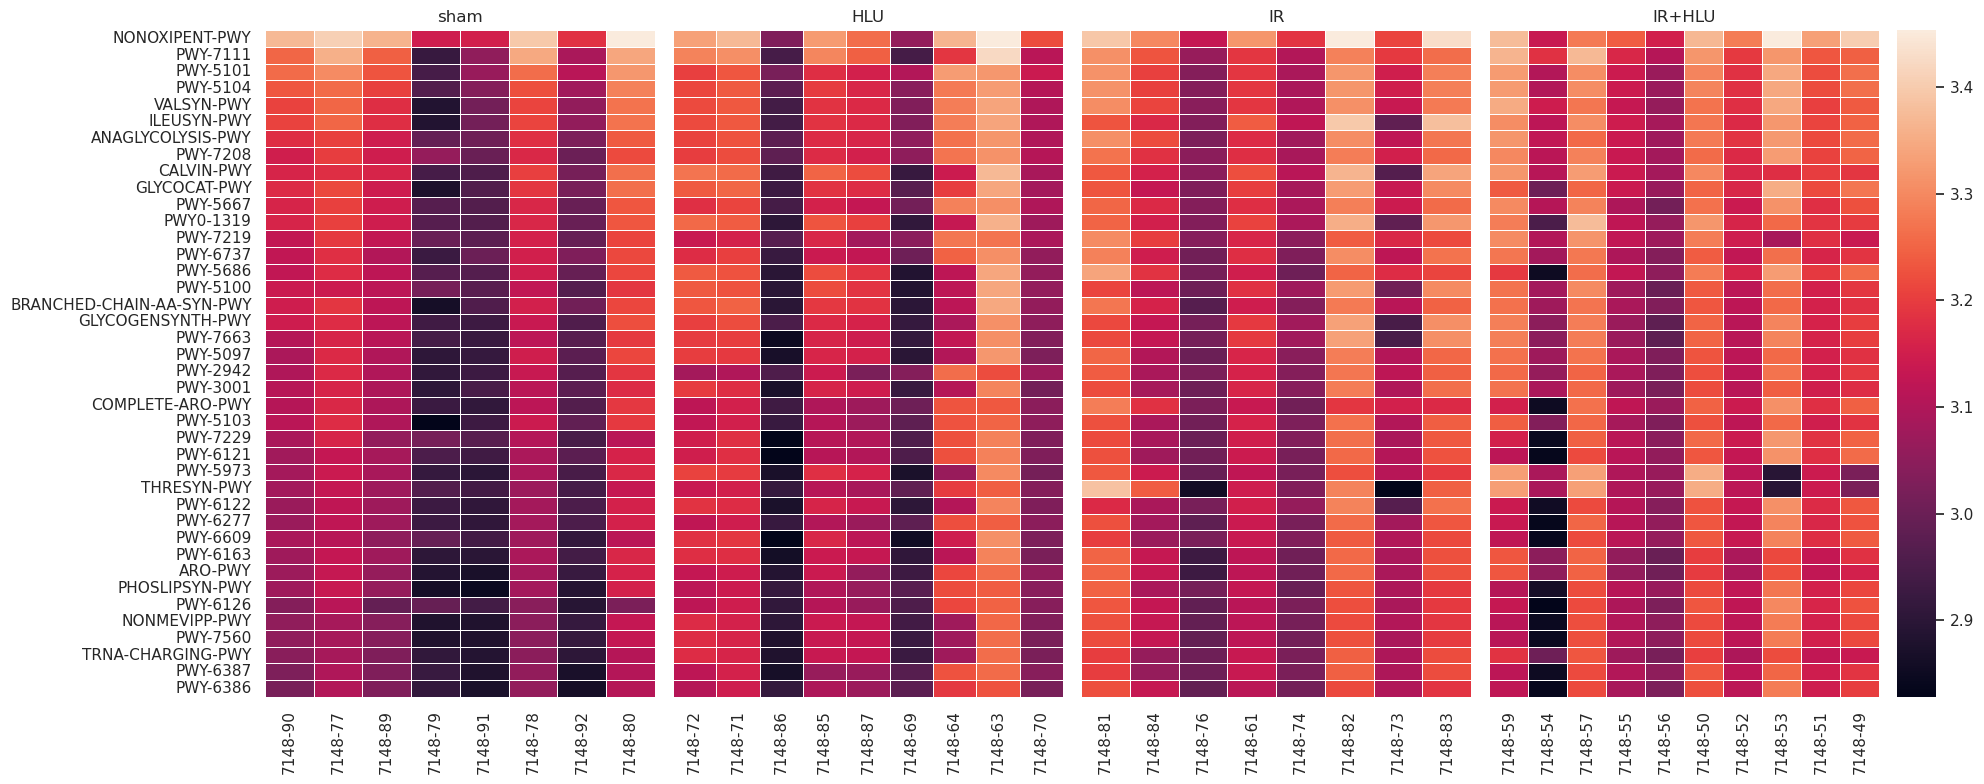

In [15]:
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(1, 5,
                                              figsize=(20, 8),
                                              gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.1]})

kwargs = dict(normalize='log10',
              flip=True,
              linewidths=0.5,
              metadata=metadata_file,
              count = 40,
              xticklabels=True)


qza_file = '/mnt/e/NASA_microbiome/downstream/pathway_abundance.qza'


dokdo.heatmap(qza_file, ax=ax1, where="[TreatmentGroup] IN ('sham')", cbar=False, yticklabels=True, **kwargs)
dokdo.heatmap(qza_file, ax=ax2, where="[TreatmentGroup] IN ('HLU')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax3, where="[TreatmentGroup] IN ('IR')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax4, where="[TreatmentGroup] IN ('IR+HLU')", yticklabels=False, cbar_ax=ax5, **kwargs)

ax1.set_title('sham')
ax2.set_title('HLU')
ax3.set_title('IR')
ax4.set_title('IR+HLU')

plt.tight_layout()

/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]


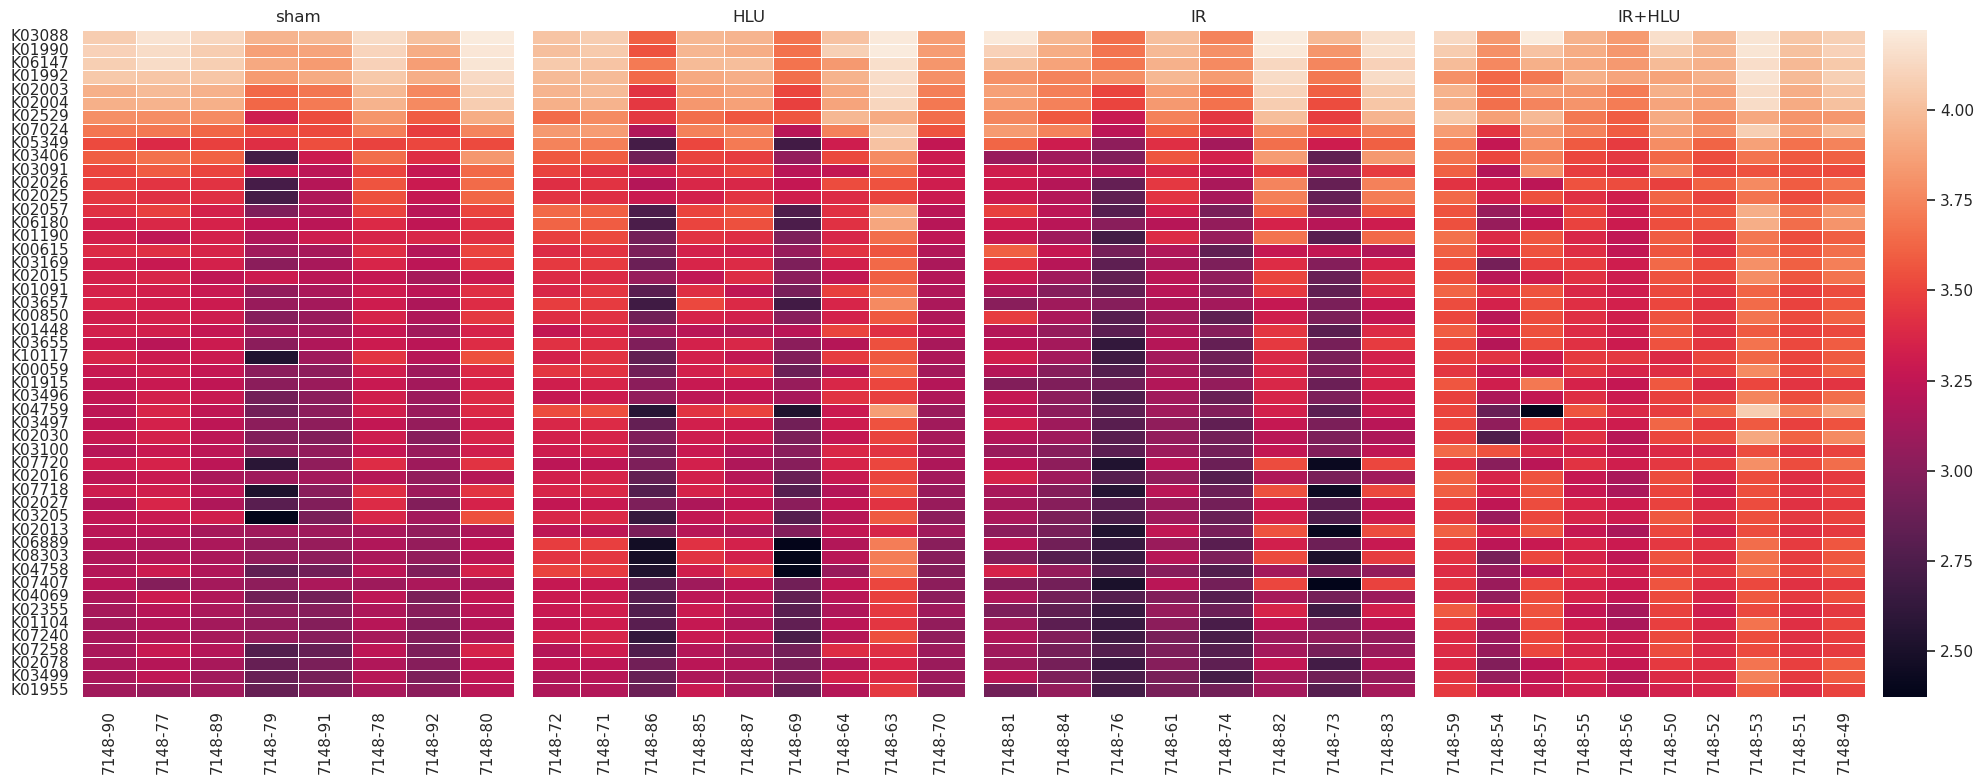

In [17]:
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(1, 5,
                                              figsize=(20, 8),
                                              gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.1]})

kwargs = dict(normalize='log10',
              flip=True,
              linewidths=0.5,
              metadata=metadata_file,
              count = 50,
              xticklabels=True)


qza_file = '/mnt/e/NASA_microbiome/downstream/ko_metagenome.qza'


dokdo.heatmap(qza_file, ax=ax1, where="[TreatmentGroup] IN ('sham')", cbar=False, yticklabels=True, **kwargs)
dokdo.heatmap(qza_file, ax=ax2, where="[TreatmentGroup] IN ('HLU')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax3, where="[TreatmentGroup] IN ('IR')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax4, where="[TreatmentGroup] IN ('IR+HLU')", yticklabels=False, cbar_ax=ax5, **kwargs)

ax1.set_title('sham')
ax2.set_title('HLU')
ax3.set_title('IR')
ax4.set_title('IR+HLU')

plt.tight_layout()

In [8]:
# EC_metagenome

/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]
/home/raotoo/miniconda/envs/qiime2-amplicon-2024.2/lib/python3.8/site-packages/dokdo/api/clustermap.py:166: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[samples]


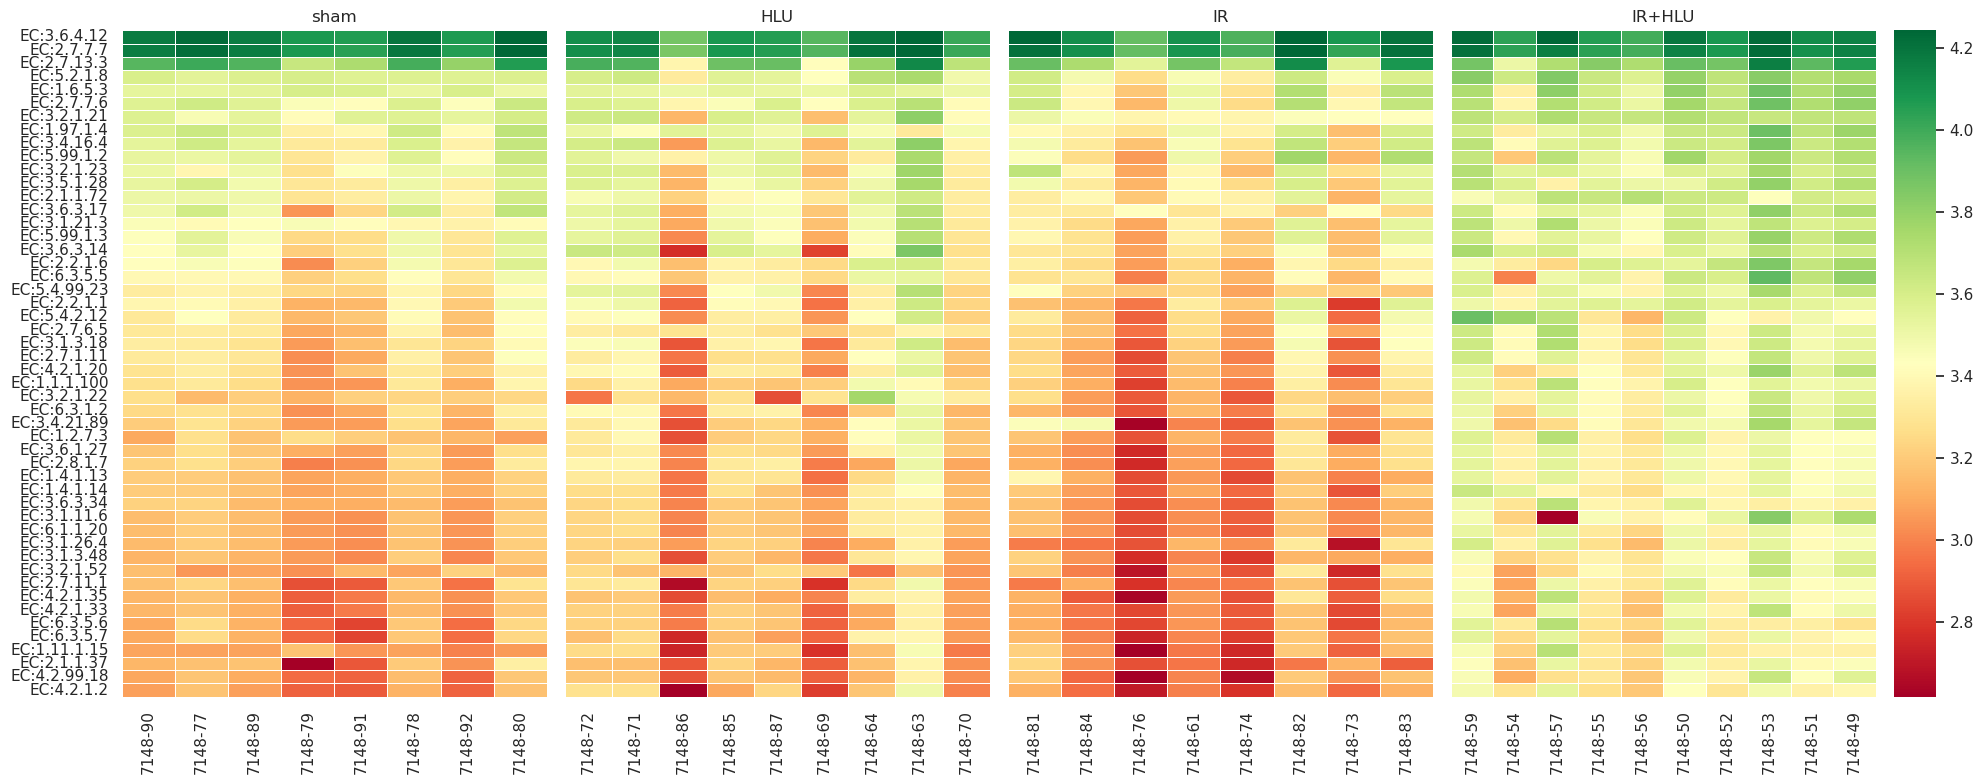

In [21]:
metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'

fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(1, 5,
                                              figsize=(20, 8),
                                              gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.1]})

kwargs = dict(normalize='log10',
              flip=True,
              linewidths=0.5,
              metadata=metadata_file,
              count = 50,
              cmap='RdYlGn',
              xticklabels=True)


qza_file = '/mnt/e/NASA_microbiome/downstream/ec_metagenome.qza'


dokdo.heatmap(qza_file, ax=ax1, where="[TreatmentGroup] IN ('sham')", cbar=False, yticklabels=True, **kwargs)
dokdo.heatmap(qza_file, ax=ax2, where="[TreatmentGroup] IN ('HLU')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax3, where="[TreatmentGroup] IN ('IR')", yticklabels=False, cbar=False, **kwargs)
dokdo.heatmap(qza_file, ax=ax4, where="[TreatmentGroup] IN ('IR+HLU')", yticklabels=False, cbar_ax=ax5, **kwargs)

ax1.set_title('sham')
ax2.set_title('HLU')
ax3.set_title('IR')
ax4.set_title('IR+HLU')

plt.tight_layout()

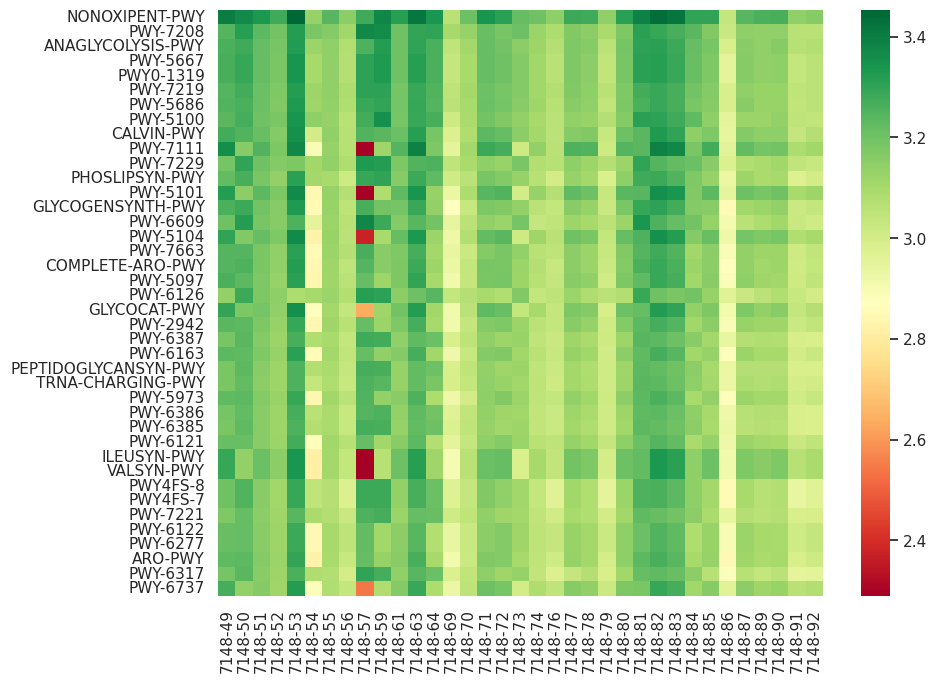

In [32]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'
qza_file = '/mnt/e/NASA_microbiome/downstream/pathway_abundance.qza'
dokdo.heatmap(qza_file,
              normalize='log10',
              flip=True,
              count = 40,
              metadata=metadata_file,
              cmap='RdYlGn',
              figsize=(10, 7))
plt.tight_layout()

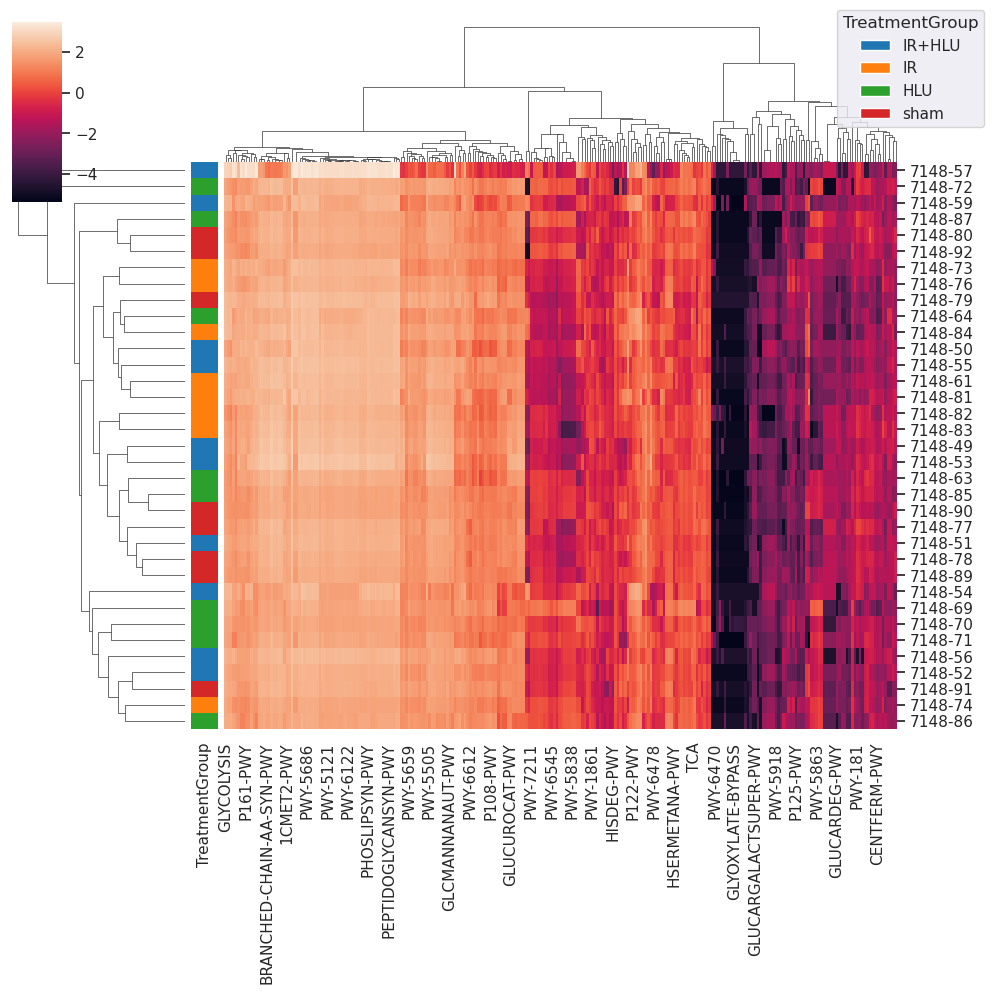

In [36]:

metadata_file = '/mnt/e/NASA_microbiome/downstream/NASA-Metadata.tsv'
dokdo.clustermap(qza_file,
                 metadata=metadata_file,
                 normalize='clr',
                 hue1='TreatmentGroup',
                 col_cluster=True
                )
